# Dimensionality reduction using PCA and LDA

---

## 1. Apply the PCA and LDA techniques on the IRIS dataset from sklearn - are both applicable? 

In [ ]:
# Importing Necessary Liberaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

### 1.1 Plotting

Text(0, 0.5, 'Principal Component 2')

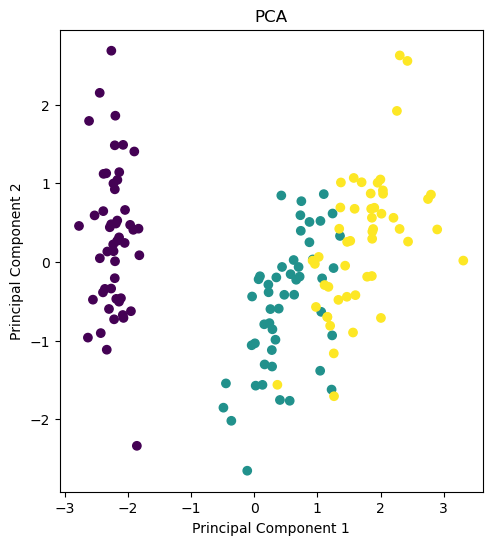

In [6]:
# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

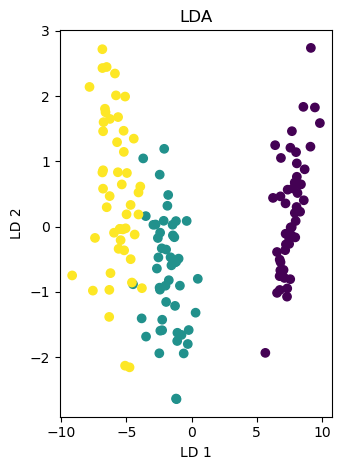

In [7]:
# Plot LDA results
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA')
plt.xlabel('LD 1')
plt.ylabel('LD 2')

plt.tight_layout()
plt.show()

Yes, both Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA) are applicable to the IRIS dataset from sklearn. Since the IRIS dataset includes both features and class labels, we can apply both PCA and LDA techniques to it. 

In summary, both PCA and LDA can be applied to the IRIS dataset, but the choice between them depends on the specific goals of analysis. If the goal is purely dimensionality reduction or visualization, PCA might suffice. If the goal is classification or maximizing class separability, LDA could be more appropriate.

## 2. Explain the difference between two approaches. 

PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both dimensionality reduction techniques, but they have different underlying principles and objectives:

1. **PCA (Principal Component Analysis):**
   - Objective: PCA aims to find the orthogonal axes (principal components) that maximize the variance in the data. It doesn't consider class labels.
   - Unsupervised: PCA is an unsupervised technique, meaning it doesn't use class information during the dimensionality reduction process.
   - Maximizes variance: PCA seeks to capture the directions of maximum variance in the data, making it useful for reducing the dimensionality of the feature space while retaining as much variance as possible.
   - Applicability: PCA is widely used for data visualization, noise reduction, and general-purpose dimensionality reduction when the main goal is to represent the data in a lower-dimensional space without specific consideration of class boundaries.

2. **LDA (Linear Discriminant Analysis):**
   - Objective: LDA aims to find the linear combinations of features that best separate different classes in the data. It explicitly considers class labels.
   - Supervised: LDA is a supervised technique because it uses class labels to maximize class separability.
   - Maximizes class separability: LDA seeks to project the data onto a lower-dimensional space while maximizing the separation between different classes. It considers both within-class and between-class scatter.
   - Applicability: LDA is particularly useful when the goal is classification or when the main interest lies in maximizing the separability between different classes in the reduced-dimensional space. It can help improve the performance of classifiers by providing more discriminative features.

## 3. Using Examples From the Colab Notebook and applying PCA and LDA with a brief explanation of the Results. 

### 3.1 PCA on Iris Dataset

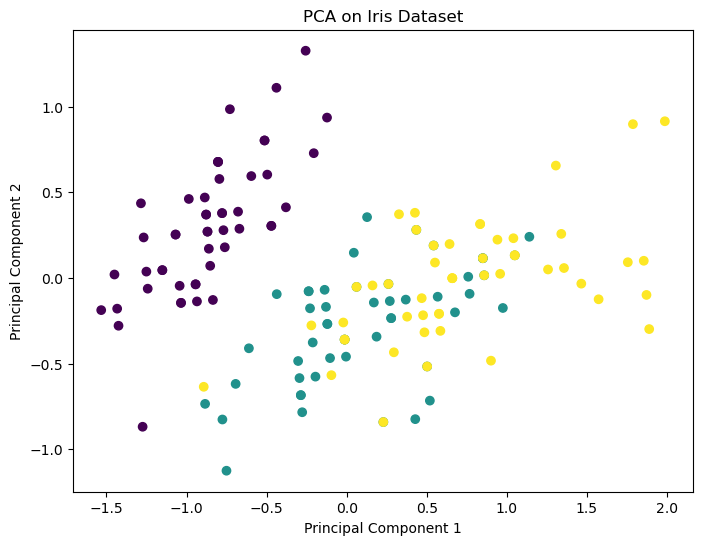

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Center the data
X_meaned = X - np.mean(X, axis=0)

# Calculate the covariance matrix and eigendecomposition
cov_mat = np.cov(X_meaned, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort components by explained variance (eigenvalues)
idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, idx]
eig_vals = eig_vals[idx]

# Select top 2 components (capturing most of the variance)
W = eig_vecs[:, :2]

# Project the data onto the new space
X_reduced = np.dot(X_meaned, W)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()

#### Explanation

- In the resulting scatter plot, we observe clusters of data points representing different species of iris flowers.
- The separation between clusters suggests that the first two principal components effectively capture much of the variability in the dataset.
- Since PCA is an unsupervised technique, the clusters are based solely on patterns of variance in the data and do not necessarily correspond to the true class labels.
- However, we can see some degree of separation between the clusters, indicating that the selected principal components are informative in distinguishing between different species of iris flowers based on their sepal measurements.

### 3.2 PCA with Eigenvectors

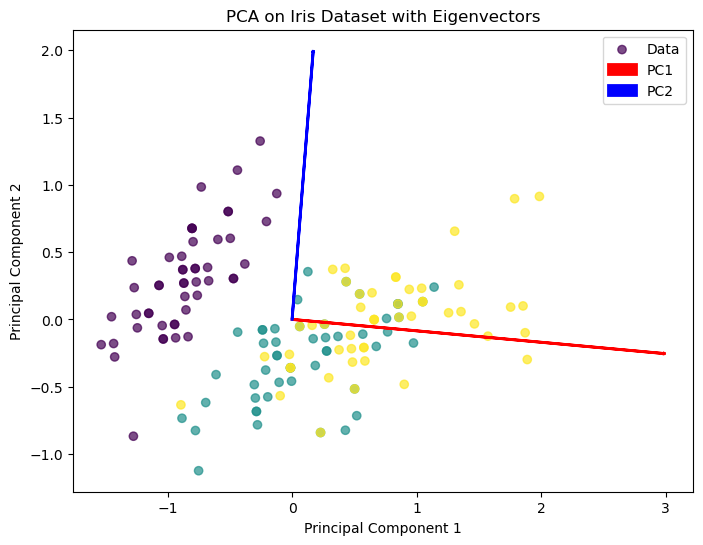

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Center the data
X_meaned = X - np.mean(X, axis=0)

# Calculate the covariance matrix and eigendecomposition
cov_mat = np.cov(X_meaned, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort components by explained variance (eigenvalues)
idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, idx]
eig_vals = eig_vals[idx]

# Select top 2 components (capturing most of the variance)
W = eig_vecs[:, :2]

# Project the data onto the new space
X_reduced = np.dot(X_meaned, W)

# Define scaling factors for visualizing eigenvectors (adjust as needed)
scale1 = 3
scale2 = 2

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7, label='Data')

# Plot the eigenvectors with arrows
plt.arrow(0, 0, scale1*eig_vecs[:, 0][0], scale1*eig_vecs[:, 0][1], color='red', linewidth=2, label='PC1')
plt.arrow(0, 0, scale2*eig_vecs[:, 1][0], scale2*eig_vecs[:, 1][1], color='blue', linewidth=2, label='PC2')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset with Eigenvectors')
plt.legend()
plt.show()


#### Interpretation:

- In the resulting scatter plot, we observe clusters of data points representing different species of iris flowers, similar to the previous visualization.
- Additionally, we now see two arrows (red and blue) representing the principal components (PC1 and PC2) in the same plot.
- The direction of each arrow indicates the orientation of the corresponding principal component in the original feature space.
- The length of each arrow represents the magnitude or importance of the corresponding principal component.
- PC1 and PC2 capture the directions of maximum variance in the data, and their lengths indicate how much of the total variance they explain.
- The visualization of eigenvectors helps us understand how the principal components are aligned with the original features and how they contribute to the variability in the dataset.

### 3.3 PCA on Height and Hand Span 

In [3]:
import numpy as np

# Define the mean and standard deviation for height and hand span
mean_height = 170
std_height = 10
mean_span = 18
std_span = 8

# Generate correlated data using a linear relationship with some noise
covariance = 0.8
np.random.seed(10)
height = np.random.normal(mean_height, std_height, 100)
noise = np.random.normal(0, 1, 100)
hand_span = covariance * height + mean_span + std_span * noise

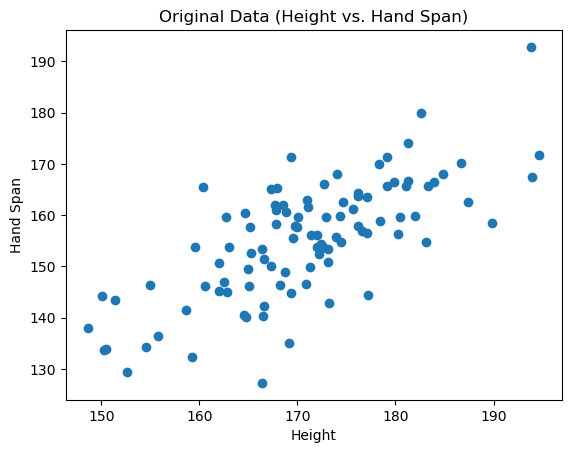

Original feature matrix:
 [[183.31586504 165.59249732]
 [177.15278974 144.46257669]
 [154.54599708 134.25352354]
 [169.9161615  157.69094067]
 [176.21335974 157.81575369]
 [162.79914439 145.0382087 ]
 [172.65511586 153.75622186]
 [171.08548526 161.65405708]
 [170.04291431 159.68897509]
 [168.25399789 146.30504691]
 [174.3302619  159.80773532]
 [182.03037374 159.85784098]
 [160.34934329 165.51407948]
 [180.28274078 156.31133872]
 [172.2863013  153.32641098]
 [174.45137613 154.77004556]
 [158.63397788 141.39497242]
 [171.35136878 156.20992837]
 [184.84537002 168.06069058]
 [159.20195114 132.41299493]
 [150.22271719 133.59326686]
 [152.56627704 129.48944127]
 [172.66070164 166.01820392]
 [193.84967331 192.8023393 ]
 [181.23691253 174.05538786]
 [186.72622213 170.15084263]
 [170.99149216 162.97332258]
 [183.97996377 166.51845315]
 [167.28752012 165.08374909]
 [176.13204185 164.24875035]
 [167.32682811 150.02188934]
 [164.50690986 140.56911833]
 [171.32708296 149.94196553]
 [165.23857985 15

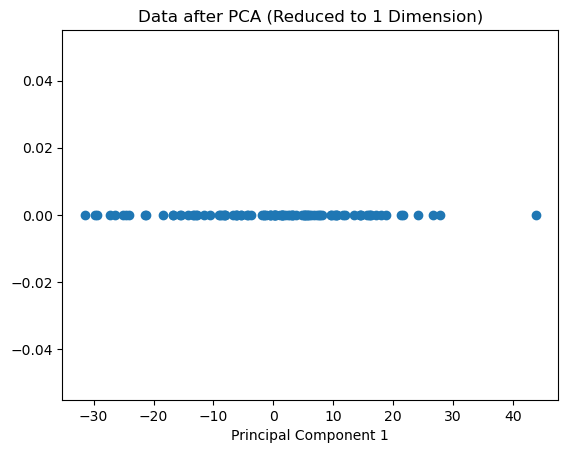

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define parameters
num_people = 100
mean_height = 170
std_height = 10
mean_span = 18
std_span = 8
covariance = 0.8

# Generate correlated data
np.random.seed(10)
height = np.random.normal(mean_height, std_height, num_people)
noise = np.random.normal(0, 1, num_people)
hand_span = covariance * height + mean_span + std_span * noise

# Create scatter plot
plt.scatter(height, hand_span)
plt.xlabel('Height')
plt.ylabel('Hand Span')
plt.title('Original Data (Height vs. Hand Span)')
plt.show()

# Apply PCA for dimensionality reduction
pca = PCA(n_components=1)
pca.fit(np.c_[height, hand_span])

# Transformed data
data_transformed = pca.transform(np.c_[height, hand_span])

# Print original and transformed feature matrices
print("Original feature matrix:\n", np.c_[height, hand_span])
print("\nTransformed feature matrix:\n", data_transformed)

# Visualize transformed data (single component)
plt.scatter(data_transformed, np.zeros_like(data_transformed))
plt.xlabel('Principal Component 1')
plt.title('Data after PCA (Reduced to 1 Dimension)')
plt.show()


#### Interpretation:
The provided code generates synthetic data for a hypothetical scenario where there's a correlation between height and hand span measurements. Then, Principal Component Analysis (PCA) is applied for dimensionality reduction to visualize the data in a lower-dimensional space. 

- In the scatter plot of the original data, we observe a trend where hand span tends to increase with height, reflecting the underlying linear relationship.
- After applying PCA, the transformed data is visualized along the single principal component.
- The spread of points along the principal component captures the variability in the original data, with individuals positioned based on their overall height-hand span relationship.
- By reducing the data to a single dimension, PCA effectively summarizes the variability in the original data while retaining the essential patterns.

### 3.4 LDA & PCA (Reducing to 2 Dimensions)

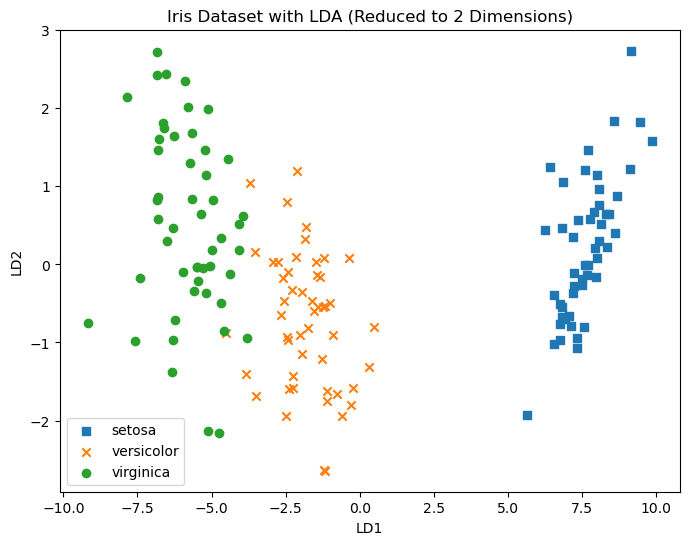

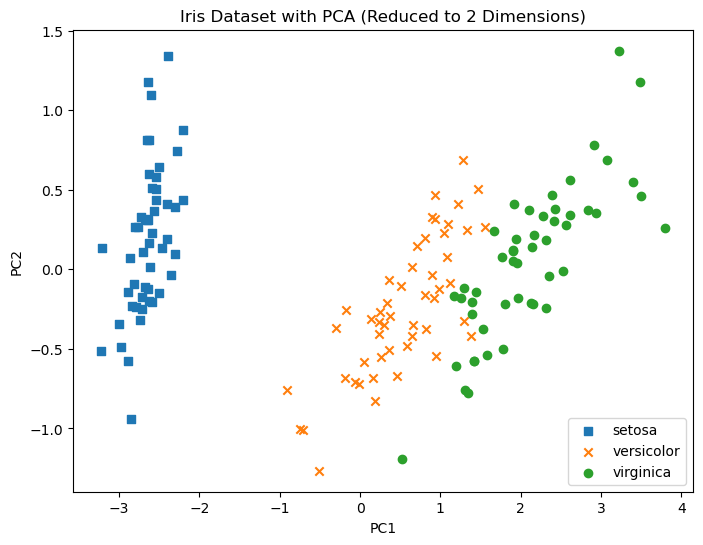

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply LDA (reducing to 2 dimensions for visualization)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Project data using PCA for visualization comparison (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data with class labels
plt.figure(figsize=(8, 6))
markers = ['s', 'x', 'o']
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[:, 0][y == i], X_lda[:, 1][y == i], marker=markers[i], label=target_name)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Iris Dataset with LDA (Reduced to 2 Dimensions)')
plt.legend()
plt.show()

# Optional: Plot with PCA for comparison
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[:, 0][y == i], X_pca[:, 1][y == i], marker=markers[i], label=target_name)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Dataset with PCA (Reduced to 2 Dimensions)')
plt.legend()
plt.show()


#### Interpretation:

The provided code performs dimensionality reduction on the Iris dataset using Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA), both reducing the data to two dimensions for visualization purposes.

- The LDA visualization demonstrates that the two linear discriminants effectively separate the three classes of iris flowers based on the provided features.
- In contrast, the PCA visualization captures the overall variance in the dataset but doesn't explicitly optimize for class separation.
- LDA is more suitable when the goal is to maximize class separability, as seen in this case with the clear separation between classes in the LDA plot.
- PCA, while useful for capturing overall variance and reducing dimensionality, might not always be optimal for class-based tasks like classification or discrimination.